In [230]:
import numpy as np
from scipy.special import expit  # Sigmoid function
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

In [231]:
class LogisticRegression:
    def __init__(self, method="gradient_descent", learning_rate=0.01, max_iter=100):
        self.method = method
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.coef_ = None
        self.avg_step_time = 0
        self.training_time = 0

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        _, n_features = X.shape

        self.coef_ = np.zeros(n_features)
        self.loss_history = []
        step_time = []

        training_start = time()
        for _ in range(self.max_iter):
            predictions = expit(X @ self.coef_)
            step_start = time()
            self._step(X, y, predictions)
            step_end = time()
            step_time.append(step_end - step_start)
            self._update_loss(predictions, y)
        training_end = time()

        self.training_time = training_end - training_start
        self.avg_step_time = np.mean(step_time)

    def _step(self, X, y, predictions):
        if self.method == "gradient_descent":
            gradient = X.T @ (y - predictions)
            self.coef_ += self.learning_rate * gradient
        elif self.method == "newton_raphson":
            W = np.diag(predictions * (1 - predictions))
            Hessian = -(X.T @ W @ X)
            gradient = X.T @ (y - predictions)
            step = np.linalg.solve(Hessian, gradient)
            self.coef_ -= step
        else:
            raise ValueError(f"Unknown method: {self.method}")

    def _update_loss(self, predictions, y):
        loss = -np.mean(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
        self.loss_history.append(loss)

    def predict_proba(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return expit(X @ self.coef_)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [232]:
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 2)
true_boundary = np.random.uniform(-5, 5, size=3)
epsilon = 0.1
logits = X @ true_boundary[1:] + true_boundary[0]
probabilities = expit(logits) + np.random.normal(0, epsilon, size=n_samples)
y = (probabilities > 0.5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
model_gd = LogisticRegression(method="gradient_descent", learning_rate=0.01)
model_gd.fit(X_train, y_train)

model_nr = LogisticRegression(method="newton_raphson")
model_nr.fit(X_train, y_train)

Gradient Descent Accuracy: 0.9533333333333334
Newton-Raphson Accuracy: 0.9633333333333334
True Boundary: [-2.38294316 -2.53021201  4.06254581]
Gradient Descent Boundary: [-4.69997014 -6.47730855  8.09637628]
Newton-Raphson Boundary: [ -9.54186002 -10.62911818  16.2317397 ]
Gradient Descent Training Time: 0.007028341293334961
Newton-Raphson Training Time: 0.16001486778259277
Gradient Descent Mean Step Time: 0.0
Newton-Raphson Mean Step Time: 0.0015172433853149413


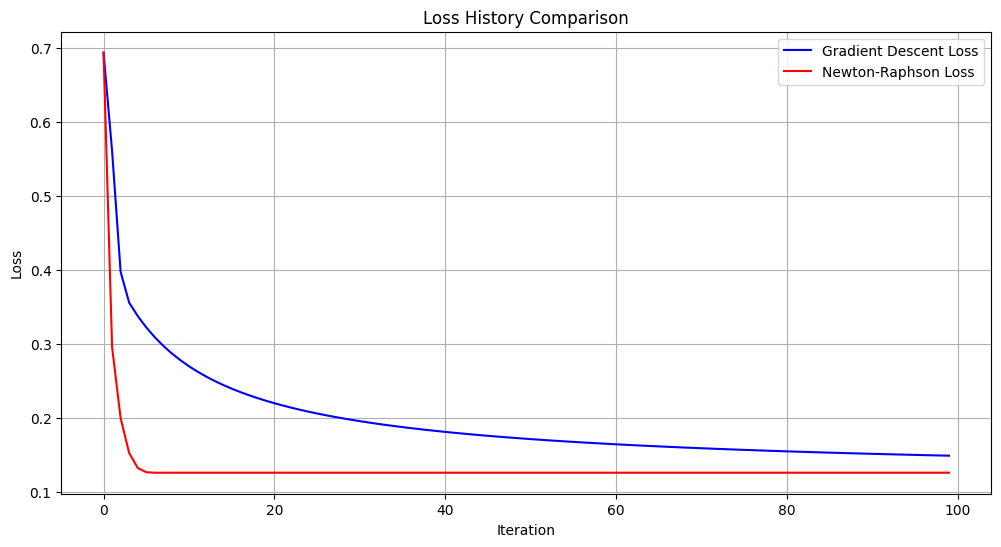

In [234]:
print("Gradient Descent Accuracy:", accuracy_score(y_test, model_gd.predict(X_test)))
print("Newton-Raphson Accuracy:", accuracy_score(y_test, model_nr.predict(X_test)))
print("True Boundary:", true_boundary)
print("Gradient Descent Boundary:", model_gd.coef_)
print("Newton-Raphson Boundary:", model_nr.coef_)
print("Gradient Descent Training Time:", model_gd.training_time)
print("Newton-Raphson Training Time:", model_nr.training_time)
print("Gradient Descent Mean Step Time:", model_gd.avg_step_time)
print("Newton-Raphson Mean Step Time:", model_nr.avg_step_time)


plt.figure(figsize=(12, 6))
plt.plot(model_gd.loss_history, label='Gradient Descent Loss', color='blue')
plt.plot(model_nr.loss_history, label='Newton-Raphson Loss', color='red')
plt.title('Loss History Comparison')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()